<a href="https://colab.research.google.com/github/rammafitra/PyTorch_Model_DeepLearning_scratch/blob/main/CNN_Multi_Classification_Water_Turbidity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown "https://drive.google.com/uc?id=1yHLQS0R3M59JyW6YRDvME7cKH8jzP_4l&export=download"
!gdown "https://drive.google.com/uc?id=12Crtwk9N-uDJBjo8YxDOgvi06bRfa5fA&export=download"


Downloading...
From: https://drive.google.com/uc?id=1yHLQS0R3M59JyW6YRDvME7cKH8jzP_4l&export=download
To: /content/te.zip
27.1MB [00:01, 14.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Crtwk9N-uDJBjo8YxDOgvi06bRfa5fA&export=download
To: /content/tr.zip
107MB [00:05, 21.0MB/s]


In [ ]:
!unzip /content/te.zip
!unzip /content/tr.zip

Archive:  /content/te.zip
   creating: te/
   creating: te/zero/
  inflating: te/zero/zero800.jpg     
  inflating: te/zero/zero801.jpg     
  inflating: te/zero/zero802.jpg     
  inflating: te/zero/zero803.jpg     
  inflating: te/zero/zero804.jpg     
  inflating: te/zero/zero805.jpg     
  inflating: te/zero/zero806.jpg     
  inflating: te/zero/zero807.jpg     
  inflating: te/zero/zero808.jpg     
  inflating: te/zero/zero809.jpg     
  inflating: te/zero/zero810.jpg     
  inflating: te/zero/zero811.jpg     
  inflating: te/zero/zero812.jpg     
  inflating: te/zero/zero813.jpg     
  inflating: te/zero/zero814.jpg     
  inflating: te/zero/zero815.jpg     
  inflating: te/zero/zero816.jpg     
  inflating: te/zero/zero817.jpg     
  inflating: te/zero/zero818.jpg     
  inflating: te/zero/zero819.jpg     
  inflating: te/zero/zero820.jpg     
  inflating: te/zero/zero821.jpg     
  inflating: te/zero/zero822.jpg     
  inflating: te/zero/zero823.jpg     
  inflating: te/zero/ze

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np
import random

# seed
random.seed(113)
torch.manual_seed(113)
torch.cuda.manual_seed(113)
np.random.seed(113)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

train_dir = "tr/"
test_dir = "te/"

img_size = 150

train_transform = transforms.Compose([
    transforms.CenterCrop(img_size),
    # transforms.Resize((150,150)),
    transforms.RandomRotation(5), 
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


test_transform = transforms.Compose([
    transforms.CenterCrop(img_size),
    # transforms.Resize((128,128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_img = datasets.ImageFolder(train_dir, transform=train_transform)
test_img = datasets.ImageFolder(test_dir, transform=test_transform)

cuda:0


In [ ]:
print("train_img type   :",type(train_img))
print("train_img length :",len(train_img))
print("test_img length :",len(test_img))
print("train_img classes:",train_img.classes)
print("train_img[0] type:",type(train_img[0]))
print("train_img[0][0] t:",type(train_img[0][0]))
print("train_img[0][1] t:",type(train_img[0][1]))
print("train_img[0][0] s:",train_img[0][0].size())
print("train_img[0][1]  :",train_img[0][1])

n_labels = len(train_img.classes)

train_img type   : <class 'torchvision.datasets.folder.ImageFolder'>
train_img length : 2400
test_img length : 600
train_img classes: ['high', 'low', 'zero']
train_img[0] type: <class 'tuple'>
train_img[0][0] t: <class 'torch.Tensor'>
train_img[0][1] t: <class 'int'>
train_img[0][0] s: torch.Size([3, 150, 150])
train_img[0][1]  : 0


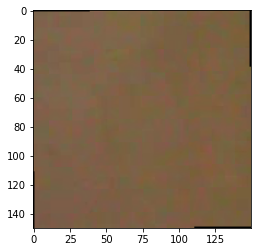

high


In [ ]:
def imshow(data_image, tensor=False):
    image = data_image[0]
    label = data_image[1]
    image = image.numpy().transpose((1, 2, 0))

    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5],)
    image = std * image + mean
    image = np.clip(image, 0, 1)

    plt.imshow(image)
    plt.show()
    
    print(train_img.classes[label])

imshow(train_img[0])

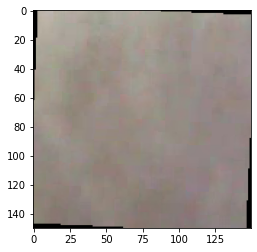

low


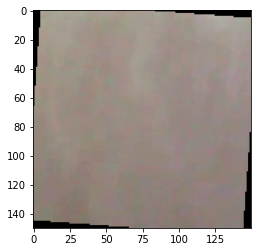

low


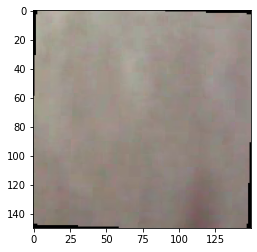

low


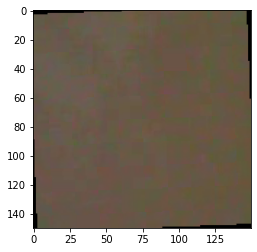

high


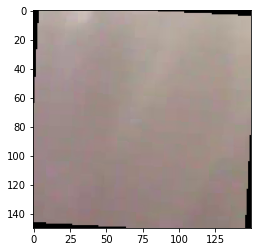

low


In [ ]:
trainloaders = torch.utils.data.DataLoader(train_img, batch_size=32, shuffle=True)
testloaders = torch.utils.data.DataLoader(test_img, batch_size=16, shuffle=True)

for image, label in trainloaders:
    for i in range(5):
        imshow((image[i], label[i]))
    break

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.features = torch.nn.Sequential(
                            nn.Conv2d(3, 16, kernel_size=4, stride=1, padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),
                            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=0),
                            nn.ReLU(),
                            nn.MaxPool2d(kernel_size=3, stride=2, padding=0))
        self.classifier = torch.nn.Sequential(
                            nn.Linear(39200, 512),
                            nn.ReLU(),
                            nn.Dropout(),
                            nn.Linear(512, 3))
    def forward(self, x):
        x = self.features(x)
        x = x.reshape(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
model = Net()
model.to(device)

Net(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=39200, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=512, out_features=3, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
epoch = 25

In [ ]:
model.train()

for i in range(epoch):
    total_loss = 0
    total_sample = 0    
    total_correct = 0
    
    for image, label in trainloaders:
        image = image.to(device)
        label = label.to(device)
        
        out = model(image)
        
        loss = criterion(out, label)
        total_loss += loss.item()
        total_sample += len(label)
        total_correct += torch.sum(torch.max(out,1)[1]==label).item()*1.0
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("epoch", i, total_loss/total_sample, total_correct/total_sample)

epoch 0 0.0009264507982384544 0.9820833333333333
epoch 1 3.152771903880414e-08 1.0
epoch 2 1.446987524541162e-08 1.0
epoch 3 7.343203361394786e-09 1.0
epoch 4 2.7054450943420074e-09 1.0
epoch 5 5.267302888689596e-08 1.0
epoch 6 1.1857917850827127e-07 1.0
epoch 7 2.4307215589399374e-09 1.0
epoch 8 6.472662118321241e-10 1.0
epoch 9 6.938335931720255e-10 1.0
epoch 10 2.8560518635275165e-10 1.0
epoch 11 7.217732269267548e-10 1.0
epoch 12 2.801510023409115e-09 1.0
epoch 13 2.825006445439371e-10 1.0
epoch 14 5.681031882883344e-10 1.0
epoch 15 1.2650104830314036e-09 1.0
epoch 16 3.1509690912034927e-10 1.0
epoch 17 1.327089956167556e-09 1.0
epoch 18 1.7695115724543817e-10 1.0
epoch 19 8.242116724307043e-10 1.0
epoch 20 3.849456918040654e-10 1.0
epoch 21 3.0888771068715573e-10 1.0
epoch 22 1.3814608753233889e-10 1.0
epoch 23 5.805211796457617e-10 1.0
epoch 24 3.2751469517903566e-10 1.0


In [ ]:
model.eval()
total_loss = 0
total_sample = 0    
total_correct = 0

for image, label in testloaders:
    image = image.to(device)
    label = label.to(device)
    
    out = model(image)

    loss = criterion(out, label)
    total_loss += loss.item()
    total_sample += len(label)
    total_correct += torch.sum(torch.max(out, 1)[1] == label).item()*1.0


print("test loss", total_loss/total_sample)
print("test accuracy", total_correct/total_sample)

test loss 0.0
test accuracy 1.0


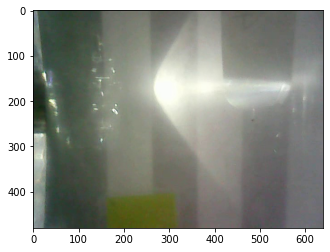

In [ ]:
imagepath = '/content/te/zero/zero803.jpg'
image_test = Image.open(imagepath)
plt.imshow(image_test)
plt.show()


In [ ]:
image_transformed = test_transform(image_test) 
image_transformed = image_transformed.unsqueeze(0).to(device)
out = model(image_transformed)
print(out)
print("PREDICTION:", train_img.classes[torch.max(out,1)[1]])


tensor([[-19.8325,  -6.2085,  25.7881]], device='cuda:0',
       grad_fn=<AddmmBackward>)
PREDICTION: zero


In [ ]:
!mkdir output10

In [ ]:
path2model="./output10/model10.pt"
torch.save(model,path2model)
_model = Net()
_model=torch.load(path2model)


In [ ]:
path2weights="./output10/weights10.pt"
torch.save(model.state_dict(), path2weights)
_model = Net()
weights=torch.load(path2weights)
_model.load_state_dict(weights)

<All keys matched successfully>

In [ ]:

from google.colab import files
!zip -r /content/output10 output10
files.download('/content/output10.zip')

  adding: output10/ (stored 0%)
  adding: output10/model10.pt (deflated 8%)
  adding: output10/weights10.pt (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import cv2
import glob as glob
import torchvision.transforms as transforms
import numpy as np

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = torch.load('/content/models_baru/model.pt')
# load the model checkpoint
checkpoint = torch.load('/content/models_baru/weights.pt', map_location=device)
model.load_state_dict(checkpoint)
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop(150),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

image_path = "/content/test_turbidity/low_turbidity/high_turbidity529.jpg"
image_test= cv2.imread(image_path)


image = transform(image_test)
    # add one extra batch dimension
image = image.unsqueeze(0).to(device)
    # forward pass the image through the model
outputs = model(image)
print(outputs)
    # get the index of the highest score
    # the highest scoring indicates the label for the Digit MNIST dataset
label = np.array(outputs.detach()).argmax()
print(label)
if(label == 0):
  print("high_turbidity")
  cv2.putText(image_test, "high_turbidity", (15, 50), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 2)
elif(label == 1):
  print("low_turbidity")
  cv2.putText(image_test, "low_turbidity", (15, 50), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 2)
elif(label == 2):
  print("zero_turbidity")
  cv2.putText(image_test, "zero_turbidity", (15, 50), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 2)



tensor([[ 34.5469,  -8.7123, -42.5316]], grad_fn=<AddmmBackward>)
0
high_turbidity


In [ ]:
import torch
import cv2
import glob as glob
import torchvision.transforms as transforms
import numpy as np
from models import Net
from PIL import Image

import json

with open('data.json') as f:
    data = json.load(f)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

model = Net()
# load the model checkpoint
checkpoint = torch.load('./models_baru/weights.pt', map_location=device)
model.load_state_dict(checkpoint)
model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.CenterCrop(150),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])


def record_video():
    video = cv2.VideoCapture(data['cameraOn'])
    width= int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height= int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    while (video.isOpened()):
        ret,frame = video.read()
        if ret == True:
            image = Image.fromarray(frame).convert('RGB')
            image = transform(image)
            image = image.unsqueeze(0).to(device)
            outputs = model(image)
            label = np.array(outputs.detach()).argmax()
            if(label == 0):
                cv2.putText(frame, "high_turbidity", (15, 50), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 2)
            elif(label == 1):
                cv2.putText(frame, "low_turbidity", (15, 50), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 2)
            elif(label == 2):
                cv2.putText(frame, "zero_turbidity", (15, 50), cv2.FONT_HERSHEY_SIMPLEX,2, (0, 255, 0), 2)
            cv2.imshow('frame', frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    video.release()
    cv2.destroyAllWindows()
